Coronavirus has become a big menance.It has been declared as a pandemic by world health organisation.Right now there are close to 2 lac cases reported and more than 7000 people have lost there lives.In India we have close to 150 cases reported.This virus has brought the world to a standstill and it will have grave implications on public health,economy and jobs.I have written a blog on Coronavirus which you can read from the link http://btplife.blogspot.com/2020/03/coronavirus.html . This kernel is a work in process I will be updating this in coming days.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv
/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv
/kaggle/input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv


### Importing the modules 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [3]:
df1 = pd.read_csv('../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv')
df2 = pd.read_csv('../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv')
df3 = pd.read_csv('../input/novel-corona-virus-2019-dataset/covid_19_data.csv')
df4 = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv')
df5 = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv')
df6 = pd.read_csv('../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv')
df1.head(1)

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2.head(1)

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.64696,117.7166,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df3.tail(1)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
11340,11341,03/23/2020,NaN,Zimbabwe,2020-03-23 23:19:21,3.0,1.0,0.0


In [6]:
df4.head(1)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0,101.0,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0


In [7]:
df5.head(1)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0,101.0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0


In [8]:
df6.head(1)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0,101.0,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0


### Summary of DataSet

In [9]:
print('Rows     :',df3.shape[0])
print('Columns  :',df3.shape[1])
print('\nFeatures :\n     :',df3.columns.tolist())
print('\nMissing values    :',df3.isnull().values.sum())
print('\nUnique values :  \n',df3.nunique())

Rows     : 11341
Columns  : 8

Features :
     : ['SNo', 'ObservationDate', 'Province/State', 'Country/Region', 'Last Update', 'Confirmed', 'Deaths', 'Recovered']

Missing values    : 3595

Unique values :  
 SNo                11341
ObservationDate       62
Province/State       286
Country/Region       203
Last Update         1898
Confirmed           1008
Deaths               192
Recovered            636
dtype: int64


### Missing Values

,Total,Percent
Province/State,3595,0.316991
Recovered,0,0.000000
Deaths,0,0.000000
Confirmed,0,0.000000
Last Update,0,0.000000


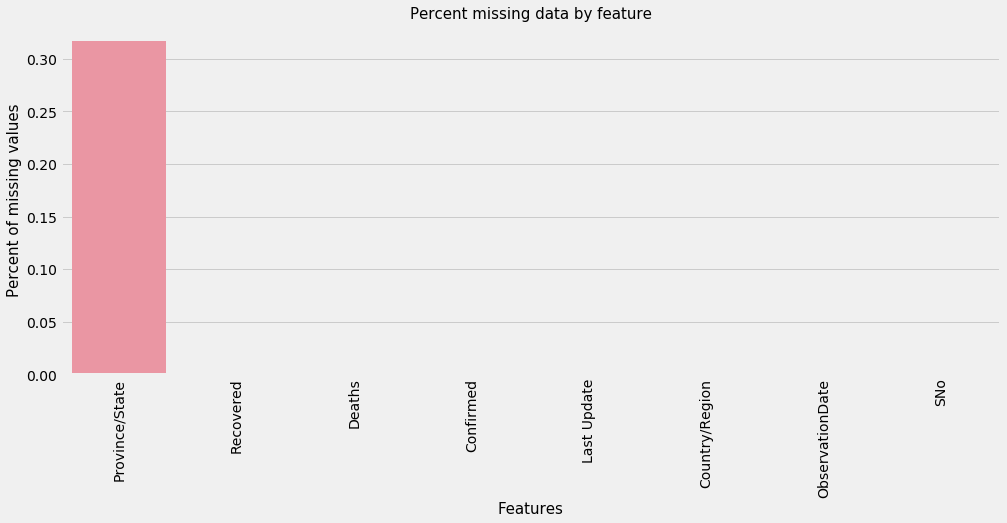

In [10]:
total = df3.isnull().sum().sort_values(ascending=False)
percent = (df3.isnull().sum()/df3.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

### Renaiming Columns

In [11]:
df3 = df3.rename(columns={'Country/Region': 'Country', 'ObservationDate':'Date','Province/State':'State'})
df3.head(2)

,SNo,Date,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


### Basic Information

In [12]:
date = df3.groupby(["Date"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
date.head()

,Confirmed,Recovered,Deaths
Date,,,
01/22/2020,555.0,28.0,17.0
01/23/2020,653.0,30.0,18.0
01/24/2020,941.0,36.0,26.0
01/25/2020,1438.0,39.0,42.0
01/26/2020,2118.0,52.0,56.0


Here We have summed up the Confirmed, Recovered and Death Numbers

In [13]:
print("Total Number of countries where Virus has Footprint:",len(df3["Country"].unique()))
print("Total Number of Confirmed Cases:",date["Confirmed"].iloc[-1])
print("Total Number of Recovered Cases:",date["Recovered"].iloc[-1])
print("Total Number of Death Cases:",date["Deaths"].iloc[-1])

Total Number of countries where Virus has Footprint: 203
Total Number of Confirmed Cases: 378287.0
Total Number of Recovered Cases: 100958.0
Total Number of Death Cases: 16497.0


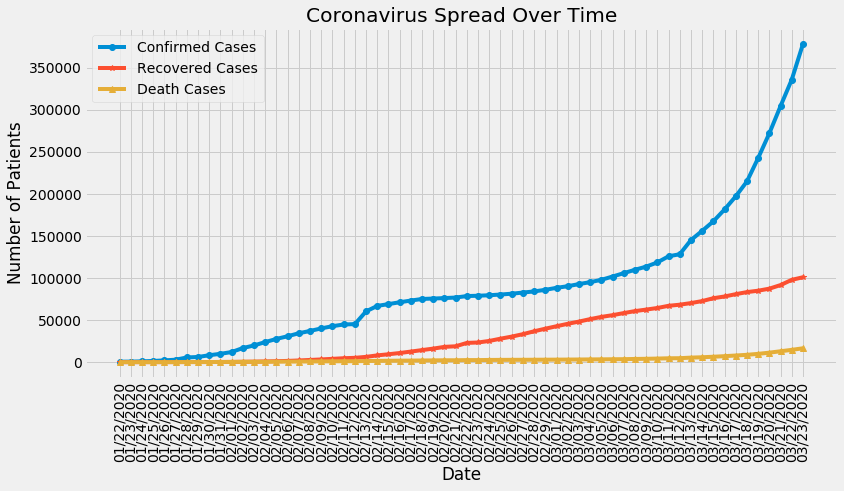

In [14]:
plt.figure(figsize=(12,6))
plt.plot(date["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(date["Recovered"],marker="*",label="Recovered Cases")
plt.plot(date["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Number of Patients")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.title("Coronavirus Spread Over Time")
plt.legend();

Everyday the Pandemic is spreading like Wild Fire.The epicentre of Pandemic had moved from China to Europe and USA.In India we are in Stage 2 of Virus Spread with cases reported more than 300.

### Working with Datetime

In [15]:
df3['Date']=pd.to_datetime(df3['Date'])

In [16]:
#df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df3['Month']=df3['Date'].apply(lambda x:x.month)
df3['DayOfWeek']=df3['Date'].apply(lambda x:x.dayofweek)

#### Cases per month

In [17]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df3['DayOfWeek']=df3['DayOfWeek'].map(dmap)

In [18]:
mmap={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df3['Month']=df3['Month'].map(mmap)
#df3

### Details

In [19]:
# Sort data
df3 = df3.sort_values(['Date','Country','State'])
# Add column of days since first case
df3['first_date'] = df3.groupby('Country')['Date'].transform('min')
df3['days'] = (df3['Date'] - df3['first_date']).dt.days
#df3

In [20]:
latest = df3[df3.Date == df3.Date.max()]
#latest

In [21]:
cty = latest.groupby('Country').sum()
cty['Death Rate'] = cty['Deaths'] / cty['Confirmed'] * 100
cty['Recovery Rate'] = cty['Recovered'] / cty['Confirmed'] * 100
cty['Active'] = cty['Confirmed'] - cty['Deaths'] - cty['Recovered']
#cty.drop('days',axis=1).sort_values('Confirmed', ascending=False).head(10)

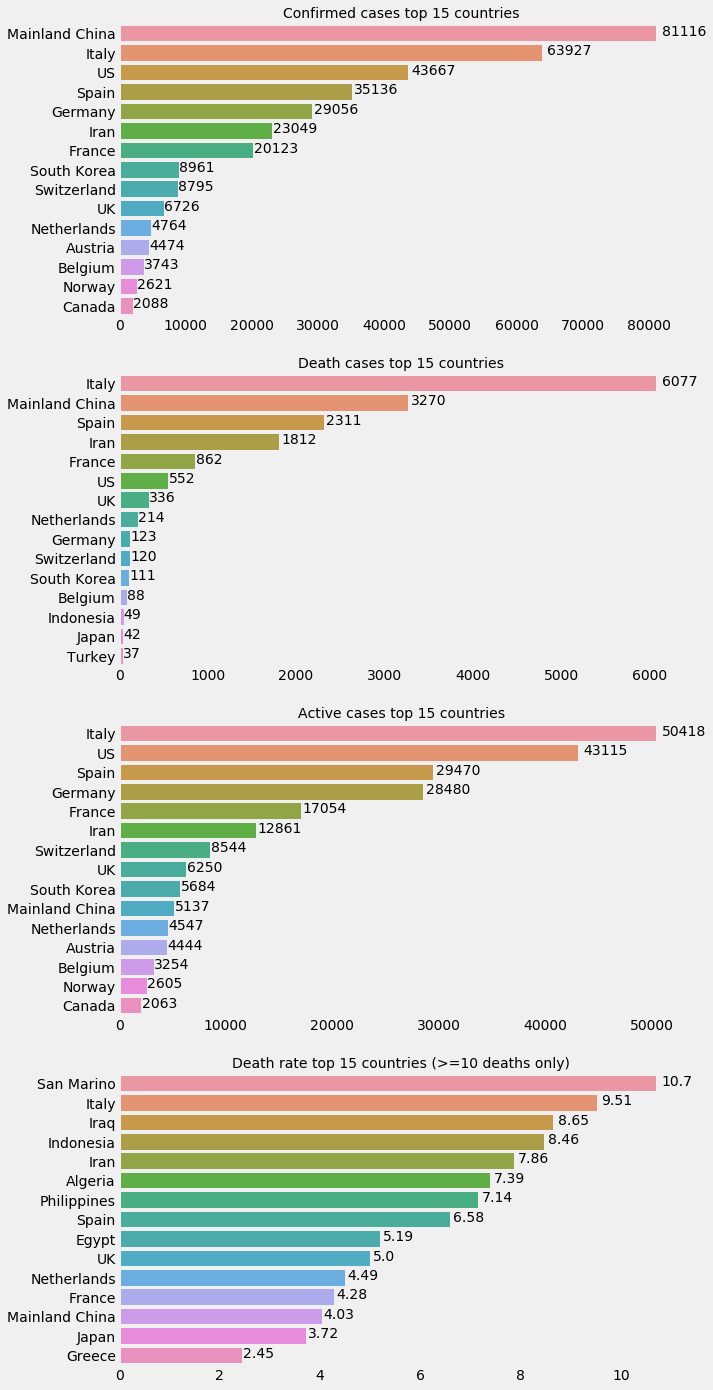

In [22]:
# fig, axes = plt.subplots(2, 2, figsize=(15, 10))
def plot_new(column, title):
    if column == 'Death Rate':
        _ = cty[cty.Deaths>=10].sort_values('Death Rate', ascending=False).head(15)
    else:
        _ = cty.sort_values(column, ascending=False).head(15)
    g = sns.barplot(_[column], _.index)
    plt.title(title, fontsize=14)
    plt.ylabel(None)
    plt.xlabel(None)
    plt.grid(axis='x')
    for i, v in enumerate(_[column]):
        if column == 'Death Rate':
            g.text(v*1.01, i+0.1, str(round(v,2)))
        else:
            g.text(v*1.01, i+0.1, str(int(v)))

plt.figure(figsize=(9,23))
plt.subplot(411)
plot_new('Confirmed','Confirmed cases top 15 countries')
plt.subplot(412)
plot_new('Deaths','Death cases top 15 countries')
plt.subplot(413)
plot_new('Active','Active cases top 15 countries')
plt.subplot(414)
plot_new('Death Rate','Death rate top 15 countries (>=10 deaths only)')
plt.show()

Sadly we can see that the highest number of Deaths have occured in Italy.Straggle the countries with starting letter I Italy,Iran,Iraq and Indonesia have highest death rate.From Death rate we can see that the virus in more lethal in Middle East.Possible reason could be early detection and Healthcare facilities.

### Heatmap Based on Month

In [23]:
dayMonth=df3.groupby(by=['DayOfWeek','Month']).count()['SNo'].unstack()

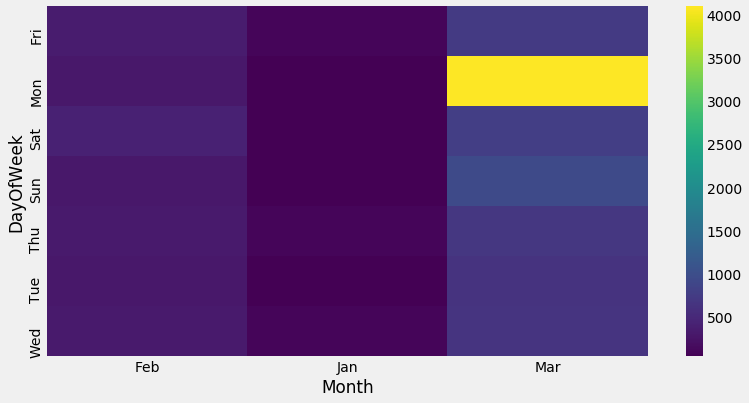

In [24]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis');

More cases get reported on Monday.Possibly this is because people avoid going to hospital on weekend.

### Cluster Map Based on Month

<Figure size 864x432 with 0 Axes>

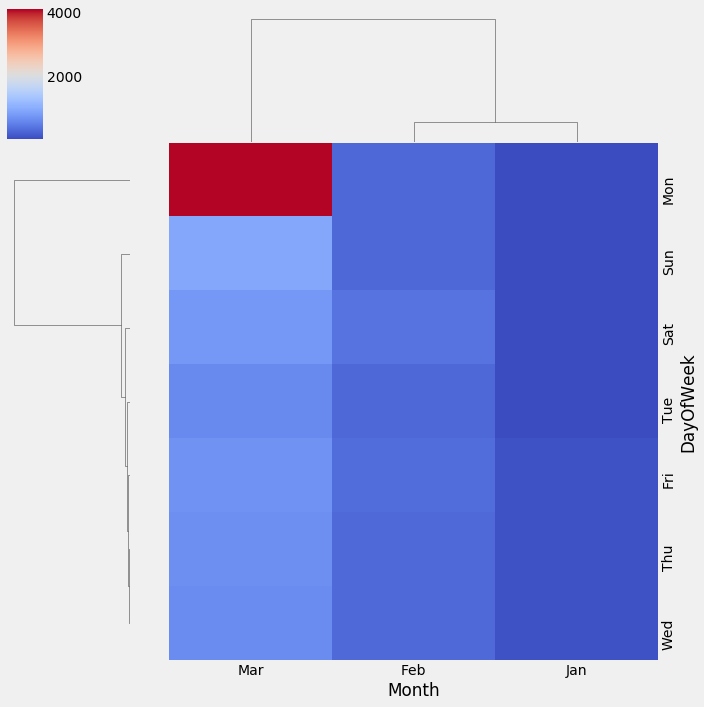

In [25]:
plt.figure(figsize=(12,6));
sns.clustermap(dayMonth,cmap='coolwarm');

### Forecasting the Future

In [26]:
confirmed = df3.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df3.groupby('Date').sum()['Deaths'].reset_index()
recovered = df3.groupby('Date').sum()['Recovered'].reset_index()

In [27]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [28]:
confirmed.head()

,ds,y
0,2020-01-22,555.0
1,2020-01-23,653.0
2,2020-01-24,941.0
3,2020-01-25,1438.0
4,2020-01-26,2118.0


In [29]:
from fbprophet import Prophet
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,334508.146352,304067.016348,367393.064262
65,2020-03-27,349652.057946,314470.173544,381542.480413
66,2020-03-28,364143.739698,331143.320741,397424.429367
67,2020-03-29,378828.803586,347204.119873,411770.533749
68,2020-03-30,393602.522200,361400.996655,425667.206609


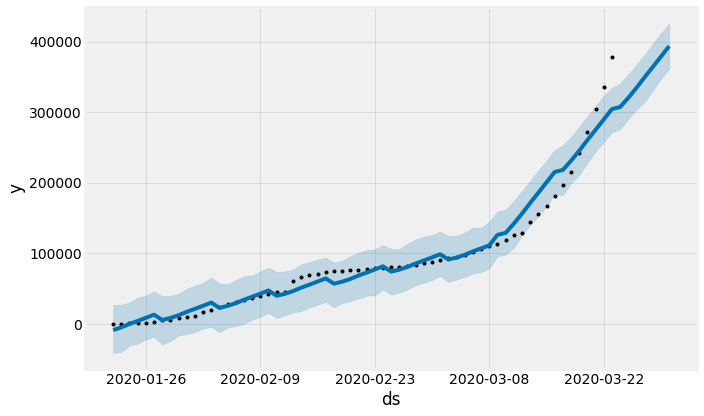

In [31]:
confirmed_forecast_plot = m.plot(forecast)

We can see that Our model is giving a lower prediction than actual confirmed cases.This is a case of concern the pandemic is spreading live wild fire and all countries are looking helpless in fron of it.

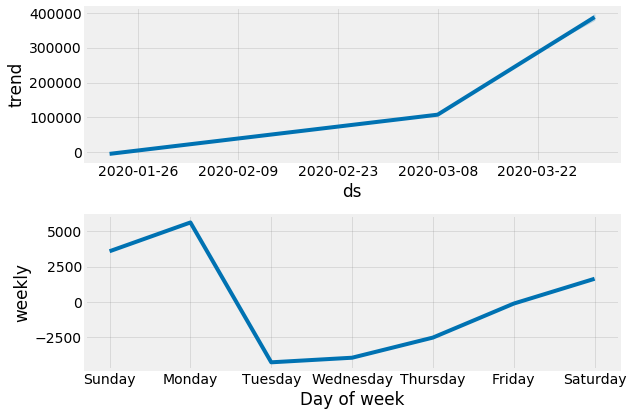

In [32]:
forecast_components = m.plot_components(forecast)

We still have data for only three months.So its not sufficient to establish a Seasonal Trend.On weekely trend curve we can see that more cases are getting reported on Monday.